## Line and line segment

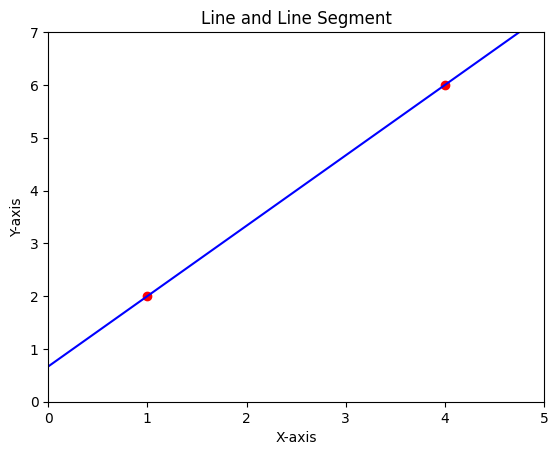

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define two points in 2D space
x1 = np.array([1, 2])  # First point
x2 = np.array([4, 6])  # Second point

# Define a range of theta values for the line segment
theta_values = np.linspace(-1, 5, 10)

# Calculate the points on the line segment for each theta
line_segment_points = np.array([theta * x1 + (1 - theta) * x2 for theta in theta_values])

# Plot the line segment
plt.plot(line_segment_points[:, 0], line_segment_points[:, 1], label="Line Segment", color='blue')

# Plot the two points as red dots
plt.scatter([x1[0], x2[0]], [x1[1], x2[1]], color='red', label="Points")

# Set axis labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Line and Line Segment")

# Set axis limits
plt.xlim(0, 5)
plt.ylim(0, 7)

# Add a legend
plt.show()


## Affine set

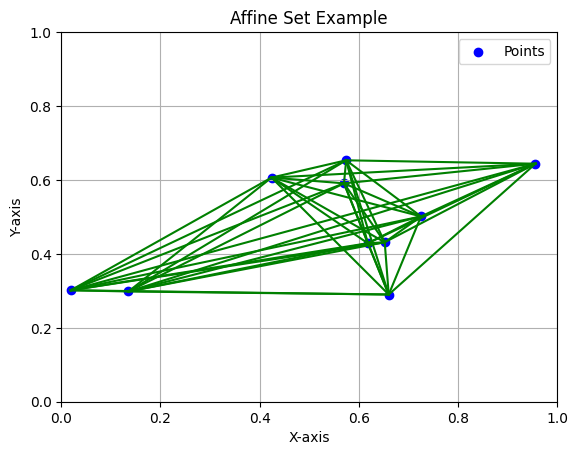

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random points in 2D space
num_points = 10  # Number of random points
points = np.random.rand(num_points, 2)  # Generate random 2D points in [0, 1]

# Create a list to store lines between distinct points
lines = []

# Check if the line through any two distinct points lies in the set
for i in range(num_points):
    for j in range(i + 1, num_points):
        # Calculate the line equation (y = mx + b) passing through points i and j
        xi, yi = points[i]
        xj, yj = points[j]
        
        # Calculate the slope (m) and y-intercept (b) of the line
        m = (yj - yi) / (xj - xi)
        b = yi - m * xi

        # Generate x values along the line between points i and j
        x_values = np.linspace(xi, xj, 100)
        
        # Calculate corresponding y values
        y_values = m * x_values + b
        
        # Check if all y values are within [0, 1] for an affine set
        if all(0 <= y <= 1 for y in y_values):
            lines.append((x_values, y_values))

# Plot the points
plt.scatter(points[:, 0], points[:, 1], color='blue', label='Points')

# Plot the lines between distinct points that lie in the set
for x_values, y_values in lines:
    plt.plot(x_values, y_values, color='green')

# Set axis limits
plt.xlim(0, 1)
plt.ylim(0, 1)

# Set axis labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Affine Set Example")

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
